In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
 df = pd.read_csv("/content/Social_Network_Ads.csv")
 df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [4]:
# Converting Gender col to Numeric using Label Encoding
label_encoder = preprocessing.LabelEncoder()


In [5]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [6]:
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [8]:
# Logistic Regression is a parametric algorithm

# Assumptions
1. No Multicolinearity

<Axes: >

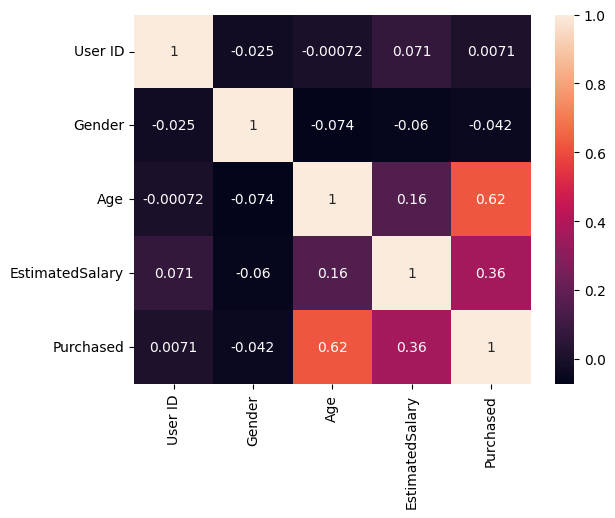

In [13]:
sns.heatmap(df.corr(),annot=True,cbar=True)

In [15]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
confusion_matrix(y_test,y_pred)

array([[47,  6],
       [ 6, 21]])

In [22]:
accuracy_score(y_test,y_pred)

0.85

<Axes: >

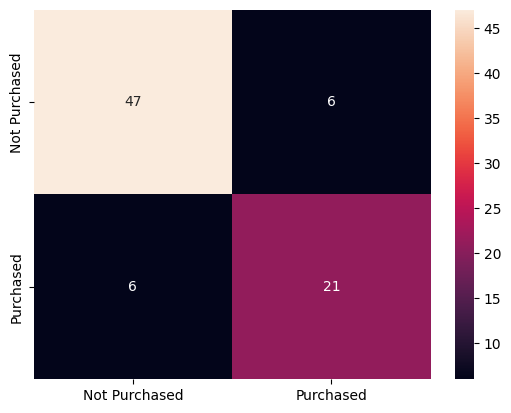

In [24]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,xticklabels=['Not Purchased','Purchased'], yticklabels=['Not Purchased','Purchased'])

In [25]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.89      0.89      0.89        53\n           1       0.78      0.78      0.78        27\n\n    accuracy                           0.85        80\n   macro avg       0.83      0.83      0.83        80\nweighted avg       0.85      0.85      0.85        80\n'